In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import data_preprocessing.stochastic_systems_models as ssm
import data_preprocessing.data_preprocessing as data
import data_preprocessing.ABC_priors_and_functions as ABC
import warnings
warnings.filterwarnings("ignore")
import data_preprocessing.plotting_functions as ABC_plot

SMALL_SIZE = 12
MEDIUM_SIZE = 16
BIGGER_SIZE = 16

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [23]:
logarithmic_params = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/logarithmic/three_population_pulse_log_accepted_params.npy")
logarithmic_eSS_params = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/logarithmic/three_population_pulse_log_accepted_params_eSS.npy")
ratiometric_params = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/ratiometric/three_population_pulse_rat_accepted_params.npy")
differential_params = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/differential/three_population_pulse_dif_accepted_params.npy")
inhibition_params = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/inhibition/three_population_pulse_inh_accepted_params.npy")
stochastic_inhibition_params = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/stochastic_inhibition/three_population_pulse_stocinh_accepted_params.npy")
dispersed_logarithmic_params = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/logarithmic/dispersed_three_population_pulse_accepted_params.npy")

logarithmic_all_sums = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/logarithmic/three_population_pulse_log_sums.npy")
ratiometric_all_sums = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/ratiometric/three_population_pulse_rat_sums.npy")
differential_all_sums = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/differential/three_population_pulse_dif_sums.npy")
inhibition_all_sums = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/inhibition/three_population_pulse_inh_sums.npy")
logarithmic_eSS_all_sums = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/logarithmic/three_population_pulse_log_sums_eSS.npy")
stochastic_inhibition_all_sums = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/stochastic_inhibition/three_population_pulse_stocinh_sums.npy")
dispersed_logarithmic_all_sums = np.load("data_preprocessing/simulated_ABC_data_birth_rate_selection/logarithmic/dispersed_three_population_pulse_sums.npy")

Computing the moving standard deviation of each birth rate for representative posterior parameters

In [24]:
sorted_mt_indices = np.argsort(data.all_assays_mito_lengths)
b0 = ssm.full_regression_coefficients[0,0]
b1 = ssm.full_regression_coefficients[0,1]

moving_variance_x, data_moving_variance = ssm.moving_variance(data.all_assays_dna_numbers, data.all_assays_mito_lengths, b0, b1, sorted_mt_indices,window_size=20)

nucleoid_output_log, _ = ssm.three_population_birth_rate_burn_in(logarithmic_params[10], ssm.logarithmic_birth, time = 1000, verbose = False)
_, log_moving_variance = ssm.moving_variance(nucleoid_output_log, data.all_assays_mito_lengths, b0, b1, sorted_mt_indices, 20)
log_heteroscedastic_distance = (np.linalg.norm(np.sqrt(data_moving_variance) - np.sqrt(log_moving_variance)))

nucleoid_output_rat, _ = ssm.three_population_birth_rate_burn_in(ratiometric_params[1], ssm.ratiometric_birth, time = 1000, verbose = False)
_, rat_moving_variance = ssm.moving_variance(nucleoid_output_rat, data.all_assays_mito_lengths, b0, b1, sorted_mt_indices, 20)
rat_heteroscedastic_distance = (np.linalg.norm(np.sqrt(data_moving_variance) - np.sqrt(rat_moving_variance)))

nucleoid_output_inh, _ = ssm.three_population_birth_rate_burn_in(inhibition_params[4], ssm.inhibition_birth, time = 1000, verbose = False)
_, inh_moving_variance = ssm.moving_variance(nucleoid_output_inh, data.all_assays_mito_lengths, b0,b1, sorted_mt_indices, 20)
inh_heteroscedastic_distance = (np.linalg.norm(np.sqrt(data_moving_variance) - np.sqrt(inh_moving_variance)))

nucleoid_output_dif, _ = ssm.three_population_birth_rate_burn_in(differential_params[0], ssm.differential_birth, time = 1000, verbose = False)
_, dif_moving_variance = ssm.moving_variance(nucleoid_output_dif, data.all_assays_mito_lengths, b0, b1, sorted_mt_indices, 20)
dif_heteroscedastic_distance = (np.linalg.norm(np.sqrt(data_moving_variance) - np.sqrt(dif_moving_variance)))

<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:63: SyntaxWarning: invalid escape sequence '\m'
<>:71: SyntaxWarning: invalid escape sequence '\m'
<>:78: SyntaxWarning: invalid escape sequence '\m'
<>:85: SyntaxWarning: invalid escape sequence '\m'
<>:7: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:28: SyntaxWarning: invalid escape sequence '\m'
<>:35: SyntaxWarning: invalid escape sequence '\m'
<>:42: SyntaxWarning: invalid escape sequence '\m'
<>:49: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid esc

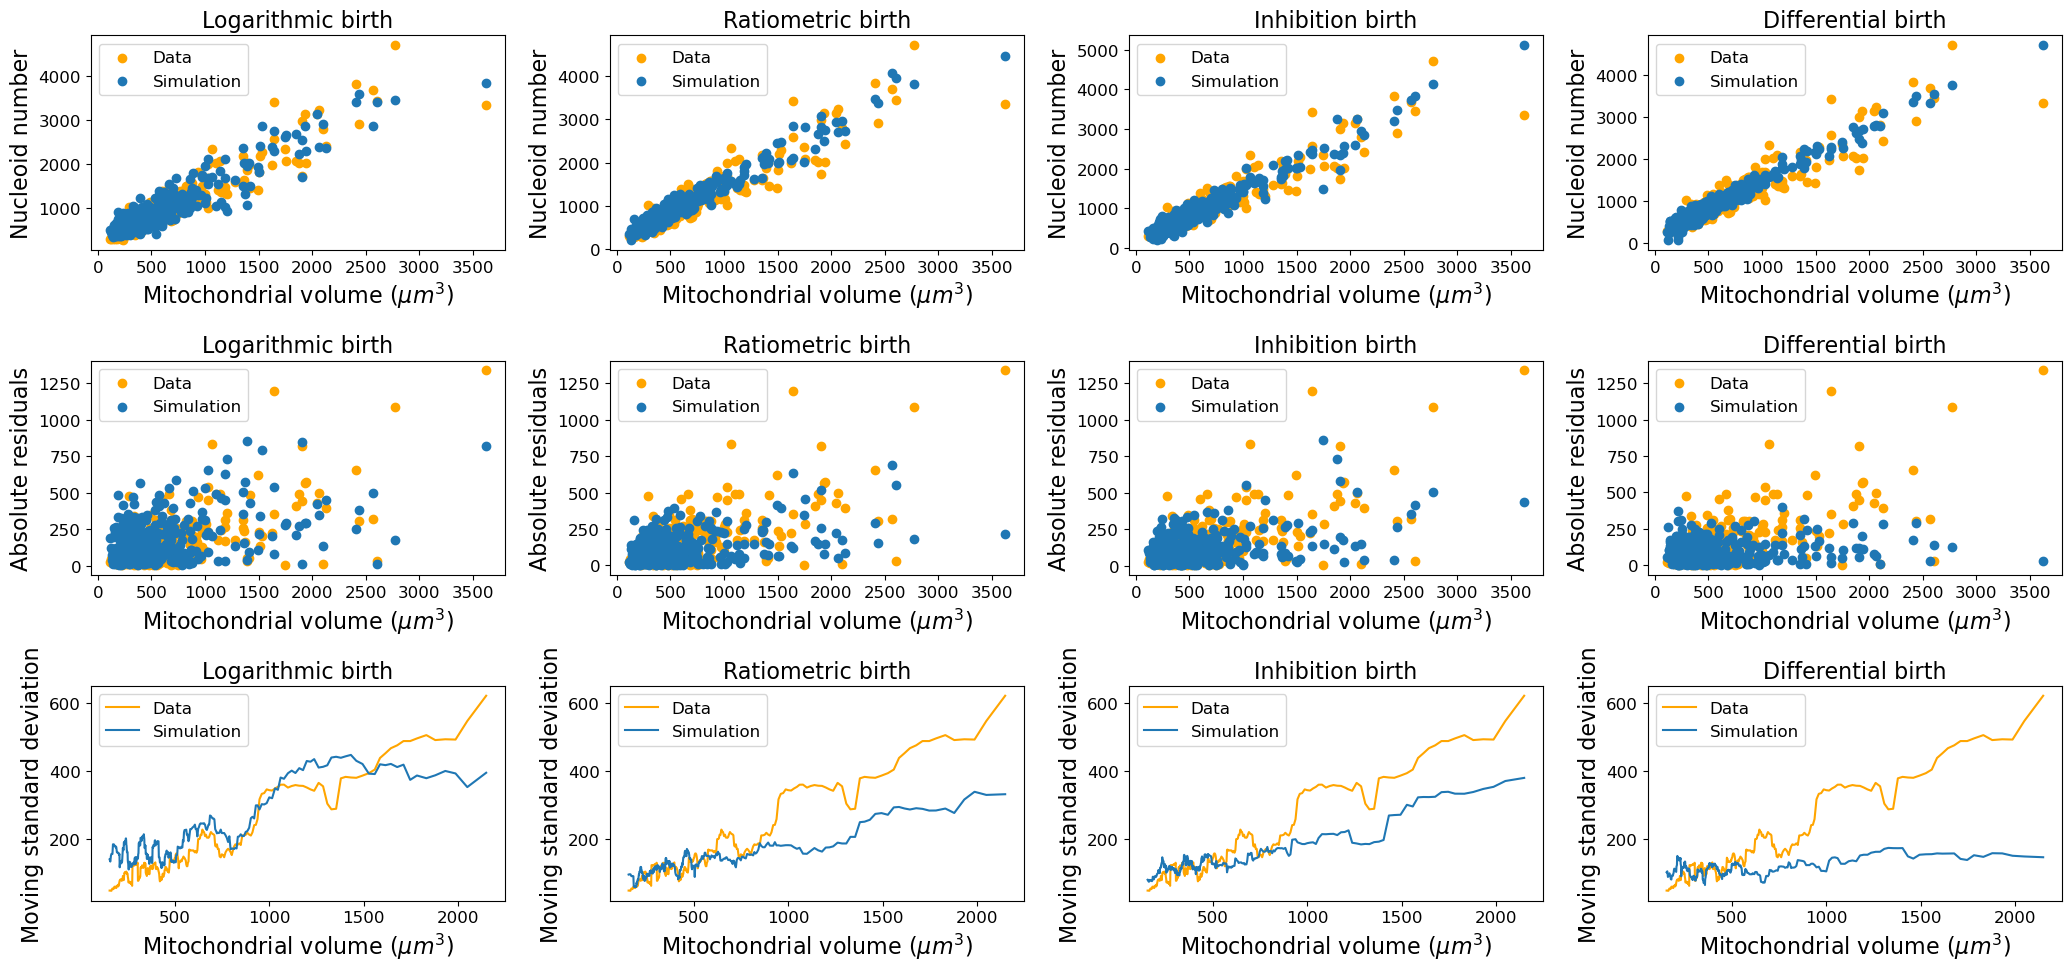

In [25]:
def compare_birth_rate_plots():
    fig, ax = plt.subplots(3,4, figsize = (21,10))

    ax[0,0].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers, color = "orange", label = "Data")
    ax[0,0].scatter(data.all_assays_mito_lengths, nucleoid_output_log, color = "tab:blue", label = "Simulation")
    ax[0,0].legend()
    ax[0,0].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[0,0].set_ylabel("Nucleoid number")
    ax[0,0].set_title("Logarithmic birth")

    ax[1,0].scatter(data.all_assays_mito_lengths, abs(data.all_assays_dna_numbers - b0 - b1*data.all_assays_mito_lengths), color = "orange", label = "Data")
    ax[1,0].scatter(data.all_assays_mito_lengths, abs(nucleoid_output_log - b0 - b1*data.all_assays_mito_lengths), color = "tab:blue", label = "Simulation")
    ax[1,0].legend()
    ax[1,0].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[1,0].set_ylabel("Absolute residuals")
    ax[1,0].set_title("Logarithmic birth")

    ax[2,0].plot(moving_variance_x, np.sqrt(data_moving_variance), color = "orange", label = "Data")
    ax[2,0].plot(moving_variance_x, np.sqrt(log_moving_variance), color = "tab:blue", label = "Simulation")
    ax[2,0].legend()
    ax[2,0].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[2,0].set_ylabel("Moving standard deviation")
    ax[2,0].set_title("Logarithmic birth")

    ax[0,1].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers, color = "orange", label = "Data")
    ax[0,1].scatter(data.all_assays_mito_lengths, nucleoid_output_rat, color = "tab:blue", label = "Simulation")
    ax[0,1].legend()
    ax[0,1].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[0,1].set_ylabel("Nucleoid number")
    ax[0,1].set_title("Ratiometric birth")

    ax[1,1].scatter(data.all_assays_mito_lengths, abs(data.all_assays_dna_numbers - b0 - b1*data.all_assays_mito_lengths), color = "orange", label = "Data")
    ax[1,1].scatter(data.all_assays_mito_lengths, abs(nucleoid_output_rat - b0 - b1*data.all_assays_mito_lengths), color = "tab:blue", label = "Simulation")
    ax[1,1].legend()
    ax[1,1].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[1,1].set_ylabel("Absolute residuals")
    ax[1,1].set_title("Ratiometric birth")

    ax[2,1].plot(moving_variance_x, np.sqrt(data_moving_variance), color = "orange", label = "Data")
    ax[2,1].plot(moving_variance_x, np.sqrt(rat_moving_variance), color = "tab:blue", label = "Simulation")
    ax[2,1].legend()
    ax[2,1].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[2,1].set_ylabel("Moving standard deviation")
    ax[2,1].set_title("Ratiometric birth")

    ax[0,2].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers, color = "orange", label = "Data")
    ax[0,2].scatter(data.all_assays_mito_lengths, nucleoid_output_inh, color = "tab:blue", label = "Simulation")
    ax[0,2].legend()
    ax[0,2].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[0,2].set_ylabel("Nucleoid number")
    ax[0,2].set_title("Inhibition birth")

    ax[1,2].scatter(data.all_assays_mito_lengths, abs(data.all_assays_dna_numbers - b0 - b1*data.all_assays_mito_lengths), color = "orange", label = "Data")
    ax[1,2].scatter(data.all_assays_mito_lengths, abs(nucleoid_output_inh - b0 - b1*data.all_assays_mito_lengths), color = "tab:blue", label = "Simulation")
    ax[1,2].legend()
    ax[1,2].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[1,2].set_ylabel("Absolute residuals")
    ax[1,2].set_title("Inhibition birth")

    ax[2,2].plot(moving_variance_x, np.sqrt(data_moving_variance), color = "orange", label = "Data")
    ax[2,2].plot(moving_variance_x, np.sqrt(inh_moving_variance), color = "tab:blue", label = "Simulation")
    ax[2,2].legend()
    ax[2,2].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[2,2].set_ylabel("Moving standard deviation")
    ax[2,2].set_title("Inhibition birth")


    ax[0,3].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers, color = "orange", label = "Data")
    ax[0,3].scatter(data.all_assays_mito_lengths, nucleoid_output_dif, color = "tab:blue", label = "Simulation")
    ax[0,3].legend()
    ax[0,3].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[0,3].set_ylabel("Nucleoid number")
    ax[0,3].set_title("Differential birth")

    ax[1,3].scatter(data.all_assays_mito_lengths, abs(data.all_assays_dna_numbers - b0 - b1*data.all_assays_mito_lengths), color = "orange", label = "Data")
    ax[1,3].scatter(data.all_assays_mito_lengths, abs(nucleoid_output_dif - b0 - b1*data.all_assays_mito_lengths), color = "tab:blue", label = "Simulation")
    ax[1,3].legend()
    ax[1,3].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[1,3].set_ylabel("Absolute residuals")
    ax[1,3].set_title("Differential birth")

    ax[2,3].plot(moving_variance_x, np.sqrt(data_moving_variance), color = "orange", label = "Data")
    ax[2,3].plot(moving_variance_x, np.sqrt(dif_moving_variance), color = "tab:blue", label = "Simulation")
    ax[2,3].legend()
    ax[2,3].set_xlabel("Mitochondrial volume $(\mu m^3)$")
    ax[2,3].set_ylabel("Moving standard deviation")
    ax[2,3].set_title("Differential birth")

    plt.tight_layout()

compare_birth_rate_plots()

ABC model selection for the birth rates

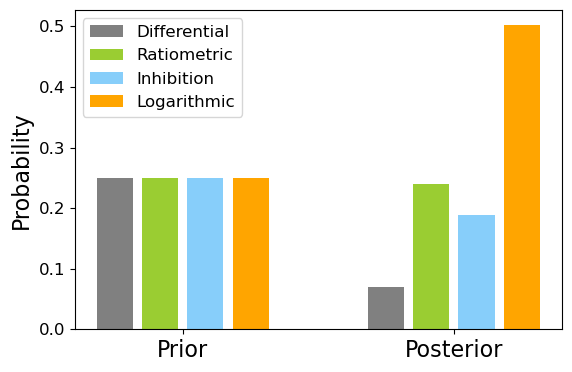

In [26]:
#order: differential, ratiometric, inhibition, logarithmic, stochastic inhibition
model_selection_params = np.concatenate([np.ones(len(differential_all_sums)), 2*np.ones(len(ratiometric_all_sums)), 3*np.ones(len(inhibition_all_sums)), 4*np.ones(len(logarithmic_all_sums))], axis = 0)
model_selection_sums = np.concatenate([differential_all_sums, ratiometric_all_sums, inhibition_all_sums, logarithmic_all_sums], axis = 0)

proportion_accepted = 500/(500000*4)
accepted_pulse_params, bandwidth = ABC.ABC_reject(model_selection_sums, model_selection_params, proportion_accepted, inference_portion="pulse", hetero=True)

names = np.array(["Differential", "Ratiometric", "Inhibition", "Logarithmic"])
colors = np.array(["grey", "yellowgreen", "lightskyblue", "orange"])
ABC_plot.model_probabilities(model_selection_params, accepted_pulse_params, names, colors)

Computing the same plot and model selection for stochastic inhibition

In [27]:
nucleoid_output_stocinh, _ = ssm.ou_three_population_birth_rate_burn_in(stochastic_inhibition_params[0], ssm.inhibition_birth, time = 1000, verbose = False)
_, stocinh_moving_variance = ssm.moving_variance(nucleoid_output_stocinh, data.all_assays_mito_lengths, b0,b1, sorted_mt_indices, 20)
stocinh_heteroscedastic_distance = (np.linalg.norm(np.sqrt(data_moving_variance) - np.sqrt(stocinh_moving_variance)))

<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:4: SyntaxWarning: invalid escape sequence '\m'
<>:9: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_14920\3441559821.py:4: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel("Mitochondrial volume $(\mu m^3)$")
C:\Users\User\AppData\Local\Temp\ipykernel_14920\3441559821.py:9: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel("Mitochondrial volume $(\mu m^3)$")
C:\Users\User\AppData\Local\Temp\ipykernel_14920\3441559821.py:14: SyntaxWarning: invalid escape sequence '\m'
  ax[2].set_xlabel("Mitochondrial volume $(\mu m^3)$")


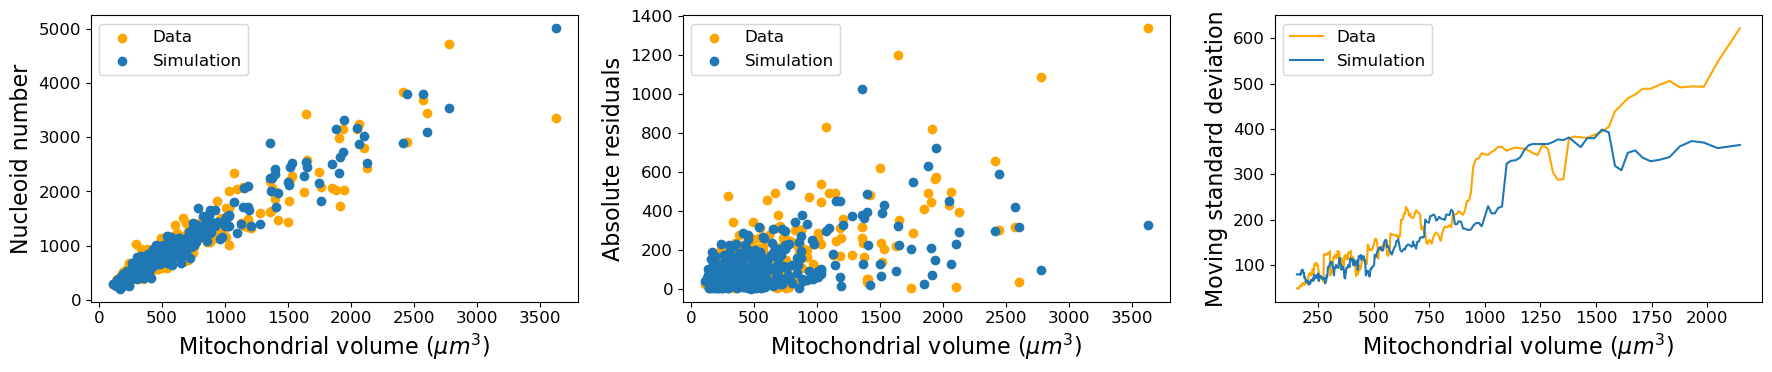

In [28]:
fig, ax = plt.subplots(1,3, figsize = (18, 4))
ax[0].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers, color = "orange", label = "Data")
ax[0].scatter(data.all_assays_mito_lengths, nucleoid_output_stocinh, color = "tab:blue", label = "Simulation")
ax[0].set_xlabel("Mitochondrial volume $(\mu m^3)$")
ax[0].set_ylabel("Nucleoid number")
ax[0].legend()
ax[1].scatter(data.all_assays_mito_lengths, abs(data.all_assays_dna_numbers - b0 - b1*data.all_assays_mito_lengths), color = "orange", label = "Data")
ax[1].scatter(data.all_assays_mito_lengths, abs(nucleoid_output_stocinh - b0 - b1*data.all_assays_mito_lengths), color = "tab:blue", label = "Simulation")
ax[1].set_xlabel("Mitochondrial volume $(\mu m^3)$")
ax[1].set_ylabel("Absolute residuals")
ax[1].legend()
ax[2].plot(moving_variance_x, np.sqrt(data_moving_variance), color = "orange", label = "Data")
ax[2].plot(moving_variance_x, np.sqrt(stocinh_moving_variance), color = "tab:blue", label = "Simulation")
ax[2].set_xlabel("Mitochondrial volume $(\mu m^3)$")
ax[2].set_ylabel("Moving standard deviation")
ax[2].legend()

plt.tight_layout()

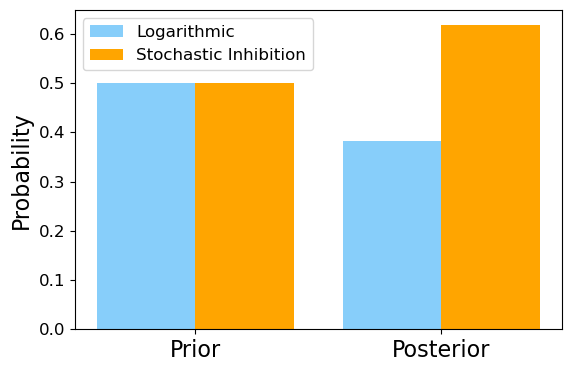

In [29]:
model_selection_params = np.concatenate([np.ones(500000), 2*np.ones(500000)], axis = 0)
model_selection_sums = np.concatenate([logarithmic_all_sums, stochastic_inhibition_all_sums], axis = 0)

proportion_accepted = 500/(500000*2)
accepted_pulse_params, bandwidth = ABC.ABC_reject(model_selection_sums, model_selection_params, proportion_accepted, inference_portion ="pulse", hetero=True)

names = np.array(["Logarithmic", "Stochastic Inhibition"])
colors = np.array(["lightskyblue", "orange"])
ABC_plot.model_probabilities(model_selection_params, accepted_pulse_params, names, colors)

Also doing model selection with dispersed logarithmic control

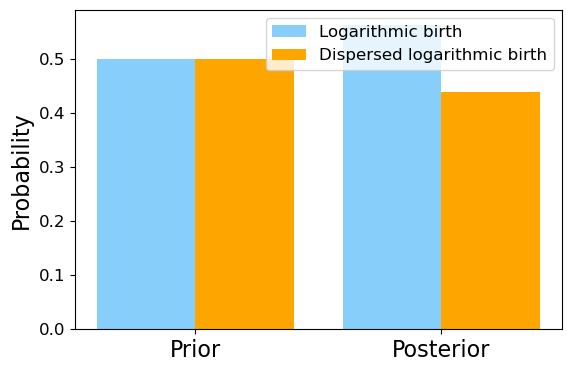

In [30]:

model_selection_params = np.concatenate([np.ones(500000), 2*np.ones(500000)], axis = 0)
model_selection_sums = np.concatenate([logarithmic_eSS_all_sums, dispersed_logarithmic_all_sums], axis = 0)

proportion_accepted = 500/(500000*2)
accepted_pulse_params, bandwidth = ABC.ABC_reject(model_selection_sums, model_selection_params, proportion_accepted, inference_portion="pulse", hetero=True, edu_hetero=True)

names = np.array(["Logarithmic birth", "Dispersed logarithmic birth"])
colors = np.array(["lightskyblue", "orange"])
ABC_plot.model_probabilities(model_selection_params, accepted_pulse_params, names, colors)

Comparing posteriors of dispersed logarithmic control to standard logarithmic control

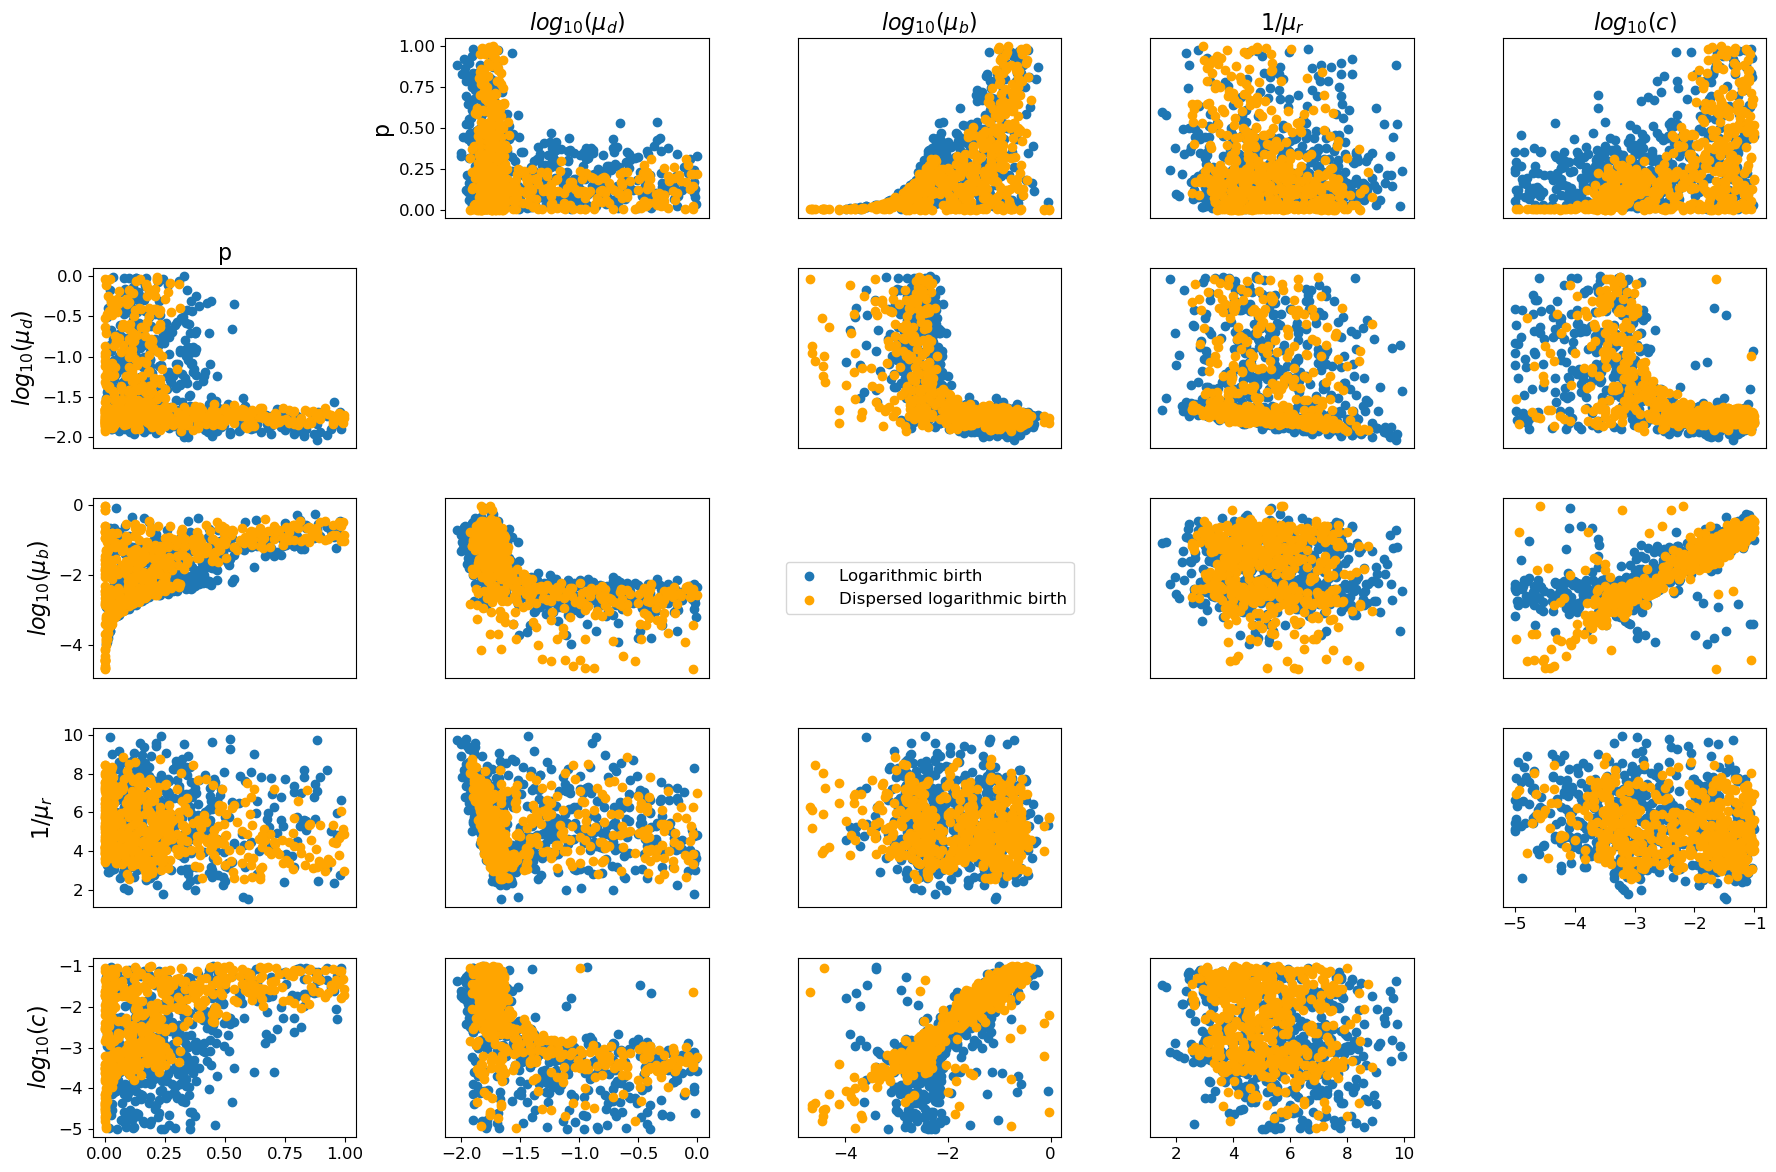

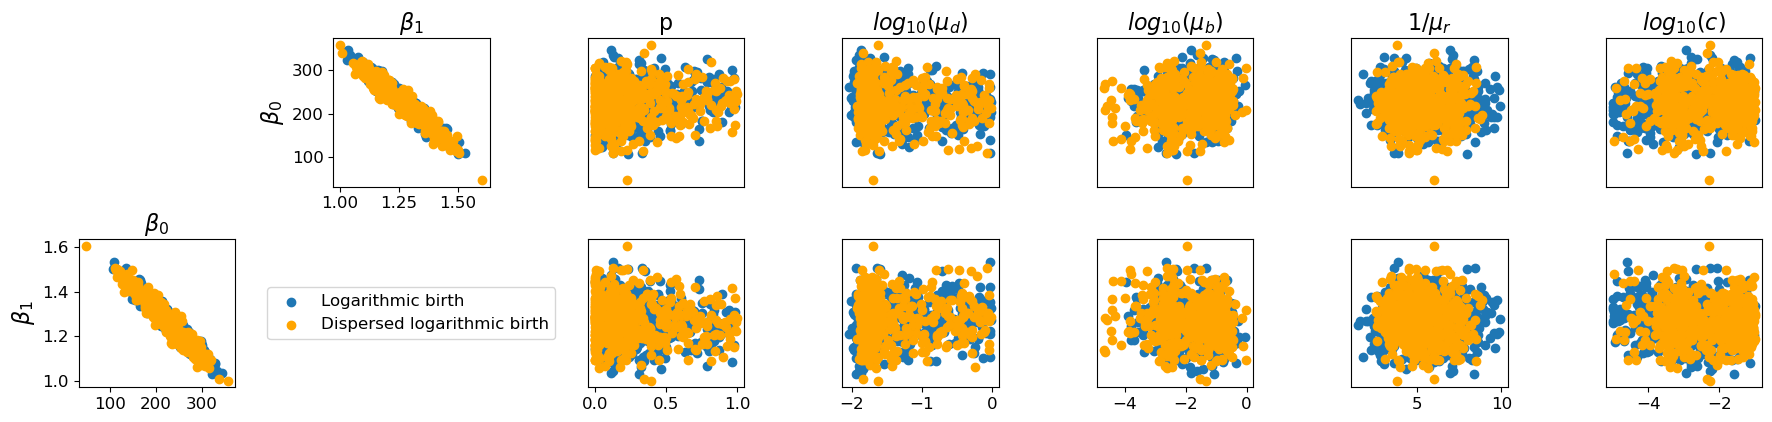

In [31]:
ABC_plot.three_population_posteriors_comparison(dispersed_logarithmic_params, logarithmic_params, dimensions = 2)

We now illustrate how the control strength parameter c influences the control strength summary statistic $S_{cs}$. We simulate logarithmic control with three different values of c and compare outputs

In [32]:
#Simulating parameters with large, medium, and small control strength c
mid_par = np.array([2.23527222e+02, 1.25827334e+00, 3.68497392e-01, 1.87180543e-02,
       6.23974919e-02, 2.02692039e-01, 2.5e-02])
big_par = np.array([2.23527222e+02, 1.25827334e+00, 3.68497392e-01, 1.87180543e-02,
       6.23974919e-02, 2.02692039e-01, 5e-01])
smol_par = np.array([2.23527222e+02, 1.25827334e+00, 3.68497392e-01, 1.87180543e-02,
       6.23974919e-02, 2.02692039e-01, 0])
nucleoid_output_mid, var_mid = ssm.three_population_birth_rate_burn_in(mid_par, ssm.logarithmic_birth, time = 250, verbose = False)
nucleoid_output_big, var_big = ssm.three_population_birth_rate_burn_in(big_par, ssm.logarithmic_birth, time = 250, verbose = False)
nucleoid_output_smol, var_smol = ssm.three_population_birth_rate_burn_in(smol_par, ssm.logarithmic_birth, time = 250, verbose = False)
Scs_mid = np.log(var_mid[-1]/var_mid[0])
Scs_big = np.log(var_big[-1]/var_big[0])
Scs_smol = np.log(var_smol[-1]/var_smol[0])

<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:16: SyntaxWarning: invalid escape sequence '\m'
<>:24: SyntaxWarning: invalid escape sequence '\m'
<>:33: SyntaxWarning: invalid escape sequence '\m'
C:\Users\User\AppData\Local\Temp\ipykernel_14920\1124658149.py:8: SyntaxWarning: invalid escape sequence '\w'
  plt.ylabel("$\widehat{Var}[\mathcal{R}(s)]$")
C:\Users\User\AppData\Local\Temp\ipykernel_14920\1124658149.py:16: SyntaxWarning: invalid escape sequence '\m'
  ax[0].set_xlabel("Mitochondrial Volume ($\mu m^3$)")
C:\Users\User\AppData\Local\Temp\ipykernel_14920\1124658149.py:24: SyntaxWarning: invalid escape sequence '\m'
  ax[1].set_xlabel("Mitochondrial Volume ($\mu m^3$)")
C:\Users\User\AppData\Local\Temp\ipykernel_14920\1124658149.py:33: SyntaxWarning: invalid escape sequenc

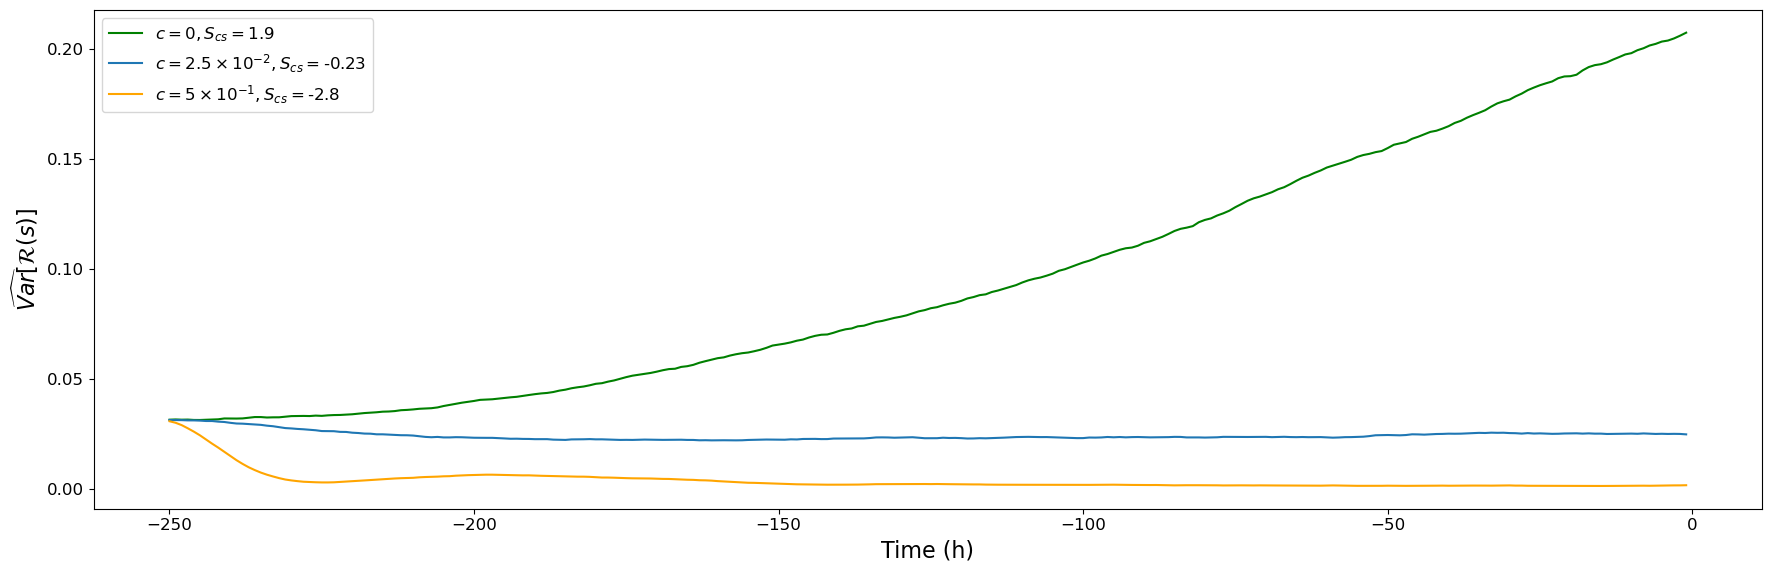

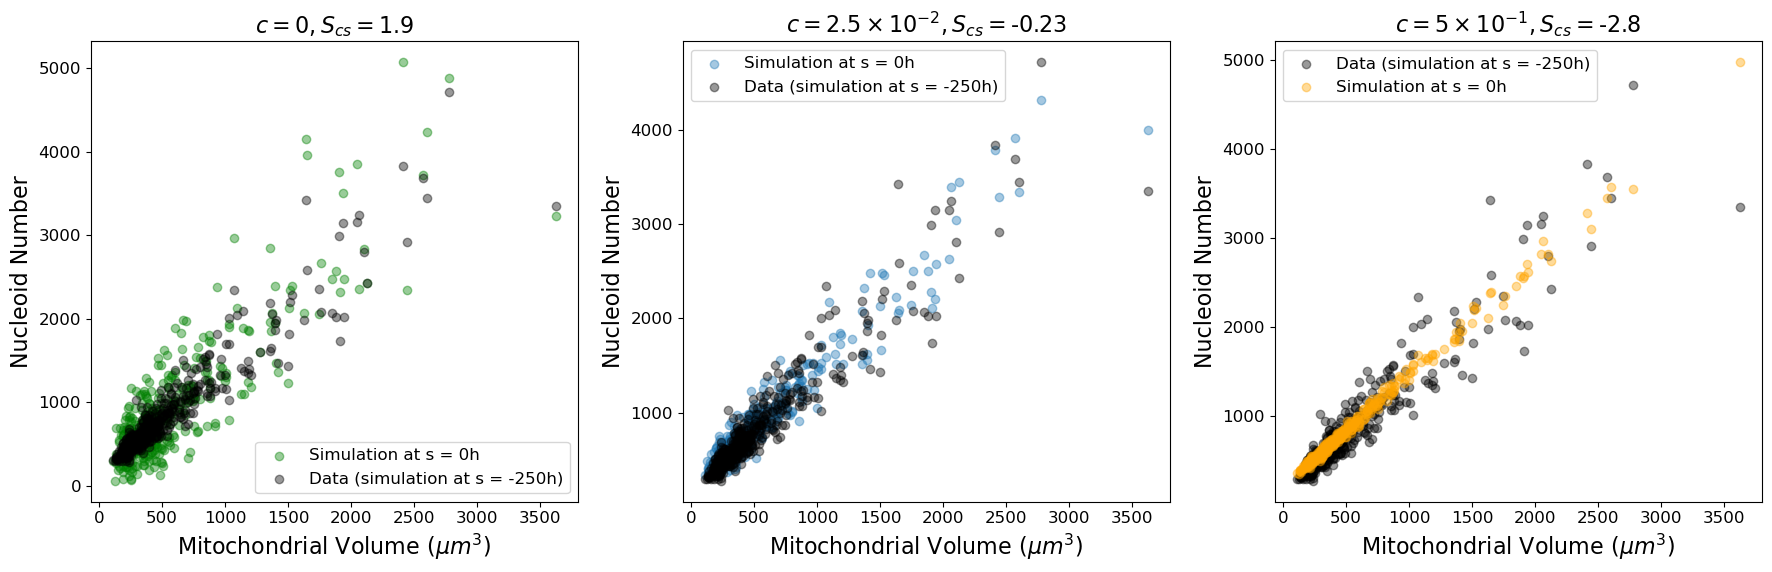

In [33]:
plt.figure(figsize=(18,6))
burn_in_times = np.arange(-250,0,1)
plt.plot(burn_in_times, var_smol, label = "$c = 0, S_{cs} = $" + str(round(Scs_smol, 1)), color = "green")
plt.plot(burn_in_times, var_mid, label = "$c = 2.5 \\times 10^{-2}, S_{cs} = $" + str(round(Scs_mid, 2)), color = "tab:blue")
plt.plot(burn_in_times, var_big, label = "$c = 5 \\times 10^{-1}, S_{cs} = $" + str(round(Scs_big, 1)), color = "orange")

plt.xlabel("Time (h)")
plt.ylabel("$\widehat{Var}[\mathcal{R}(s)]$")
plt.legend()
plt.tight_layout()

fig, ax = plt.subplots(1,3, figsize = (18,6))
ax[0].scatter(data.all_assays_mito_lengths, nucleoid_output_smol, label = "Simulation at s = 0h", c = "green", alpha = 0.4)
ax[0].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers, label = "Data (simulation at s = -250h)", c = "black", alpha = 0.4)

ax[0].set_xlabel("Mitochondrial Volume ($\mu m^3$)")
ax[0].set_ylabel("Nucleoid Number")
ax[0].legend()
ax[0].set_title("$c = 0, S_{cs} = $" + str(round(Scs_smol, 1)))

ax[1].scatter(data.all_assays_mito_lengths, nucleoid_output_mid, label = "Simulation at s = 0h", color = "tab:blue", alpha = 0.4)
ax[1].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers, label = "Data (simulation at s = -250h)", c = "black", alpha = 0.4)

ax[1].set_xlabel("Mitochondrial Volume ($\mu m^3$)")
ax[1].set_ylabel("Nucleoid Number")
ax[1].legend()
ax[1].set_title("$c = 2.5 \\times 10^{-2}, S_{cs} = $" + str(round(Scs_mid, 2)))

ax[2].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers, label = "Data (simulation at s = -250h)", c = "black", alpha = 0.4)
ax[2].scatter(data.all_assays_mito_lengths, nucleoid_output_big, label = "Simulation at s = 0h", color = "orange", alpha = 0.4)


ax[2].set_xlabel("Mitochondrial Volume ($\mu m^3$)")
ax[2].set_ylabel("Nucleoid Number")
ax[2].legend()
ax[2].set_title("$c = 5 \\times 10^{-1}, S_{cs} = $" + str(round(Scs_big, 1)))

plt.tight_layout()
